In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

from lib import *
from lib.maxent import *
from lib.plotting import *
plt.style.use('../peptidome.mplstyle')

%load_ext autoreload
%autoreload 2

In [2]:
k = 9
proteome = 'Human'

In [3]:
matrix = load_matrix('../maxent/data/{proteome}_test_k{k}_matrix.csv.gz'.format(proteome=proteome, k=k))

In [4]:
params = np.load('../maxent/data/Human_nskewfcov_k9_params.npz')
energy = make_energy(params)

In [5]:
#params = np.load('../maxent/data/Human_nskewfcov_k9_params.npz')
#energy_human = make_energy(params)
#params = np.load('../maxent/data/Humanviruses_nskewfcov_k9_params.npz')
#energy_pathogen = make_energy(params)
#energy = lambda x: energy_human(x) - energy_pathogen(x)

In [6]:
likelihood_human = np.array([-energy(x) for x in matrix])

In [7]:
loglikelihood = lambda seq, k: -energy(map_aatonumber(seq.upper()))
likelihoodname = 'maxent'

In [8]:
# only human host
df_t = load_iedb_tcellepitopes(human_only=True)
print(df_t.shape[0])

285467


In [9]:
# only MHC I epitopes
df_t = df_t[df_t['MHC', 'Class']=='I']
print(df_t.shape[0])

83870


In [10]:
# only epitopes of length k
mask = df_t['Epitope', 'Description'].apply(len)==k
df_t = df_t[mask]
print(df_t.shape[0])

45769


In [11]:
# no host epitopes
host = 'Homo sapiens'
# can also set na=True to exclude epitopes of unknown provenance
mask = ~df_t['Epitope', 'Parent Species'].str.contains(host, na=False)
df_t = df_t[mask]
print(df_t.shape[0])

38800


In [12]:
# exclude autoimmune / allergy / cancer epitopes
mask = ~(df_t['1st in vivo Process', 'Process Type'].isin(['Occurrence of autoimmune disease', 
                                                           'Occurrence of allergy',
                                                           'Occurrence of cancer']))
df_t = df_t[mask]
print(df_t.shape[0])

36172


In [13]:
# restrict to ELISPOT assay
mask = df_t['Assay', 'Method/Technique'] == 'ELISPOT'
df_t = df_t[mask]
print(df_t.shape[0])

19935


In [14]:
# uniquify epitopes by keeping only the most frequent qualitative measure
def most_frequent(x):
    counts = x.value_counts(dropna=False)
    if len(counts):
        return counts.index[0]
    else:
        print(x, counts)
    return np.nan
d = df_t[[('Epitope', 'Description'), ('Assay', 'Positive')]].groupby(('Epitope', 'Description')).agg(most_frequent)
d = d.reset_index()
len(d)

7261

In [15]:
d['nenergy'] = d['Epitope', 'Description'].apply(lambda seq: -energy(map_aatonumber(seq.upper())))

In [16]:
df_t[df_t['Epitope', 'Description']=='YPLTFGWCY']

Reference  \
                                Assay IRI   
103759  http://www.iedb.org/assay/1620313   
103760  http://www.iedb.org/assay/1620314   
103761  http://www.iedb.org/assay/1620315   
103762  http://www.iedb.org/assay/1620316   
103763  http://www.iedb.org/assay/1620317   
103764  http://www.iedb.org/assay/1620318   
103765  http://www.iedb.org/assay/1620319   
103766  http://www.iedb.org/assay/1620320   

                                                                       \
                                Reference IRI        Type   PubMed ID   
103759  http://www.iedb.org/reference/1014154  Literature  17705138.0   
103760  http://www.iedb.org/reference/1014154  Literature  17705138.0   
103761  http://www.iedb.org/reference/1014154  Literature  17705138.0   
103762  http://www.iedb.org/reference/1014154  Literature  17705138.0   
103763  http://www.iedb.org/reference/1014154  Literature  17705138.0   
103764  http://www.iedb.org/reference/1014154  Literature  17705138.0   
103765  http://www.iedb.org/reference/1014154  Literature  17705138.0   
103766  http://www.iedb.org/reference/1014154  Literature  17705138.0   

                                                                          \
                                                  Authors        Journal   
103759  Nicole Frahm; Karina Yusim; Todd J Suscovich; ...  Eur J Immunol   
103760  Nicole Frahm; Karina Yusim; Todd J Suscovich; ...  Eur J Immunol   
103761  Nicole Frahm; Karina Yusim; Todd J Suscovich; ...  Eur J Immunol   
103762  Nicole Frahm; Karina Yusim; Todd J Suscovich; ...  Eur J Immunol   
103763  Nicole Frahm; Karina Yusim; Todd J Suscovich; ...  Eur J Immunol   
103764  Nicole Frahm; Karina Yusim; Todd J Suscovich; ...  Eur J Immunol   
103765  Nicole Frahm; Karina Yusim; Todd J Suscovich; ...  Eur J Immunol   
103766  Nicole Frahm; Karina Yusim; Todd J Suscovich; ...  Eur J Immunol   

                                                                               \
        Date                                              Title Submission ID   
103759  2007  Extensive HLA class I allele promiscuity among...           NaN   
103760  2007  Extensive HLA class I allele promiscuity among...           NaN   
103761  2007  Extensive HLA class I allele promiscuity among...           NaN   
103762  2007  Extensive HLA class I allele promiscuity among...           NaN   
103763  2007  Extensive HLA class I allele promiscuity among...           NaN   
103764  2007  Extensive HLA class I allele promiscuity among...           NaN   
103765  2007  Extensive HLA class I allele promiscuity among...           NaN   
103766  2007  Extensive HLA class I allele promiscuity among...           NaN   

                                   Epitope  ...  \
                               Epitope IRI  ...   
103759  http://www.iedb.org/epitope/102254  ...   
103760  http://www.iedb.org/epitope/102254  ...   
103761  http://www.iedb.org/epitope/102254  ...   
103762  http://www.iedb.org/epitope/102254  ...   
103763  http://www.iedb.org/epitope/102254  ...   
103764  http://www.iedb.org/epitope/102254  ...   
103765  http://www.iedb.org/epitope/102254  ...   
103766  http://www.iedb.org/epitope/102254  ...   

                                         Assay Antigen                      \
                           Antigen Source Molecule IRI Protein Parent Name   
103759  http://www.ncbi.nlm.nih.gov/protein/ACQ72180.1         Protein Nef   
103760  http://www.ncbi.nlm.nih.gov/protein/ACQ72180.1         Protein Nef   
103761  http://www.ncbi.nlm.nih.gov/protein/ACQ72180.1         Protein Nef   
103762  http://www.ncbi.nlm.nih.gov/protein/ACQ72180.1         Protein Nef   
103763  http://www.ncbi.nlm.nih.gov/protein/ACQ72180.1         Protein Nef   
103764  http://www.ncbi.nlm.nih.gov/protein/ACQ72180.1         Protein Nef   
103765  http://www.ncbi.nlm.nih.gov/protein/ACQ72180.1         Protein Nef   
103766  http://www.ncbi.nlm.nih.gov/protein/ACQ72180.1         Pr

In [17]:
#xmin, xmax = likelihood_human.min(), likelihood_human.max()
xmin, xmax = np.quantile(likelihood_human, 0.01)-1, np.quantile(likelihood_human, 0.99)+1
hists_pos = {}
hists_neg = {}
lengths = [9]
for length in lengths:
    positive = d['Assay', 'Positive']
#    lengthmask = np.abs(df_ts['Epitope', 'Description'].str.len()-length)<2
    likelihoods_t, weights_t = likelihoods_epitopes(d[positive]['Epitope', 'Description'], loglikelihood, k)
    likelihoods_t_neg, weights_t_neg = likelihoods_epitopes(d[(~positive)]['Epitope', 'Description'], loglikelihood, k)

    #bins = list(np.linspace(xmin+3, xmax-8, 25))
    bins = list(np.linspace(xmin, xmax, 10))
    bins.extend([xmin-1.0, xmax+1.0])
    bins = np.array(sorted(bins))
    binmids = (bins[1:]+bins[:-1])*0.5
    hists_pos[length] = np.histogram(likelihoods_t, bins=bins, weights=weights_t)[0]
    hists_neg[length]= np.histogram(likelihoods_t_neg, bins=bins, weights=weights_t_neg)[0]

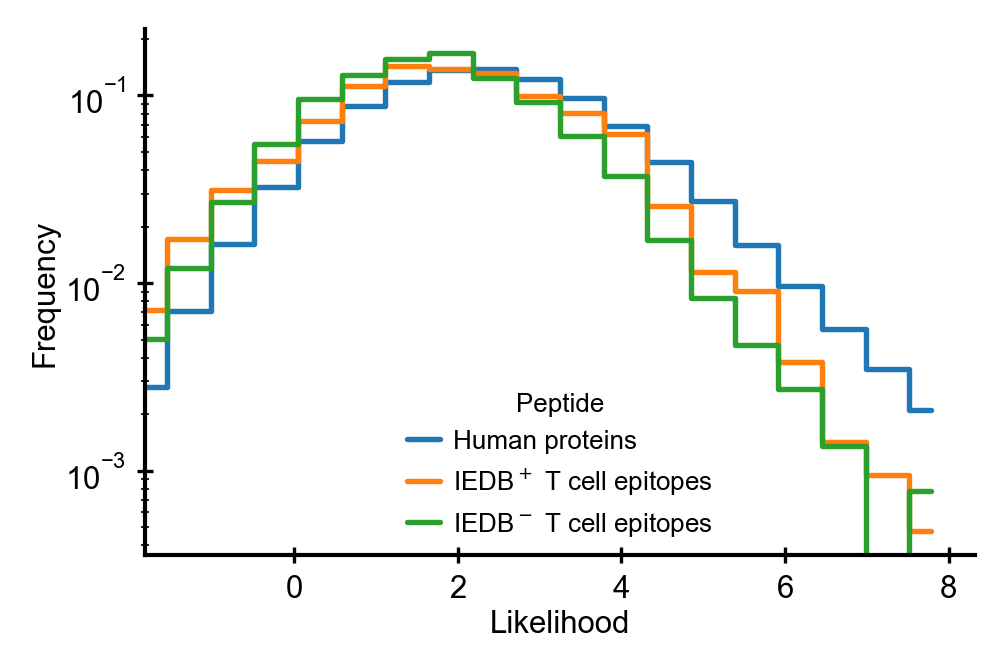

In [18]:
fig, ax = plt.subplots()
ps = [likelihood_human, likelihoods_t, likelihoods_t_neg]#, likelihoods_b]
labels = ['Human proteins', 'IEDB$^+$ T cell epitopes', 'IEDB$^-$ T cell epitopes']#, 'B epitopes']
weights = [np.ones(len(likelihood_human)), weights_t, weights_t_neg]#, weights_b]
plot_histograms(ps, labels, weights=weights, xmin=xmin, xmax=xmax, ax=ax, nbins=20)
ax.set_xlim(xmin, xmax)
ax.set_ylabel('Frequency')
ax.set_xlabel('Likelihood')
ax.set_yscale('log')
ax.legend(title='Peptide', loc='lower center')
fig.tight_layout()

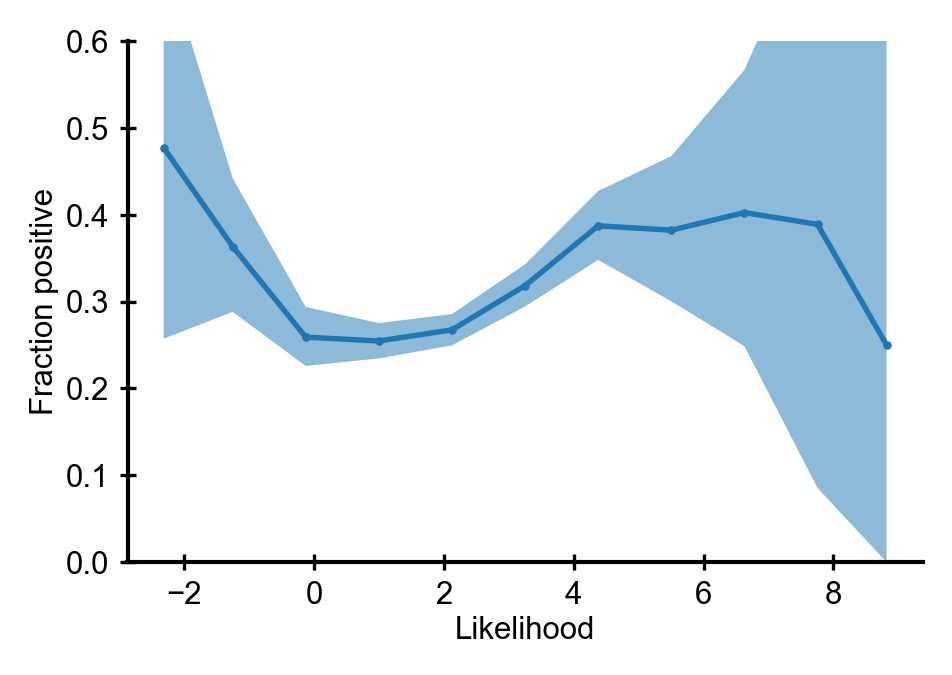

In [19]:
fig, ax = plt.subplots()
hist_pos, hist_neg = hists_pos[length], hists_neg[length]
plot_proportion(binmids, hist_pos, hist_pos+hist_neg, ls='-', marker='.', ax=ax)
ax.set_xlabel('Likelihood')
ax.set_ylabel('Fraction positive')
ax.set_ylim(0.0, 0.6)
fig.savefig('maxent_iedb_fraction_positive.png')

In [20]:
d[d['Assay', 'Positive']]['Epitope', 'Description']

0       AAAAGWQTL
1       AAAGDKLSL
3       AAAWYLWEV
4       AAERKHRHL
5       AAFSSARFL
          ...    
7233    YYKVFLARL
7235    YYLEKANKI
7238    YYMATLKNV
7251    YYQLYSTQL
7259    YYYAGSSRL
Name: (Epitope, Description), Length: 2101, dtype: object

In [51]:
positive = d['Assay', 'Positive']
dfs = []
for mask in [~positive, positive]:
    df = counter_to_df(count_kmers_iterable(d[mask]['Epitope', 'Description'], 1), norm=True)
    dfs.append(df)
dfmerged = pd.merge(dfs[0], dfs[1], on='seq', suffixes=['_negative', '_positive'])
dfmerged.sort_values('seq', inplace=True)

In [52]:
def plot(dfmerged):
    freq1, freq2 = dfmerged.columns[1:]
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    xmin, xmax = 0.5*np.amin(dfmerged[freq1]), 2*np.amax(dfmerged[freq1])
    x = np.logspace(np.log10(xmin), np.log10(xmax))
    linecolor = 'gray'
    ax.plot(x, x, '-', lw=2, color=linecolor)
    ax.plot(x, x*2, '--', lw=2, color=linecolor)
    ax.plot(x, x/2, '--', lw=2, color=linecolor)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(xmin, xmax)
    dfmerged.plot(x=freq1, y=freq2, kind='scatter', logx=True, logy=True, ax=ax);
    x, y = dfmerged[freq1], dfmerged[freq2],
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    ax.set_title('$r^2={0:.2f}$'.format(r_value**2))
    for index, row in dfmerged.iterrows():
        x, y, label = row[freq1], row[freq2], row['seq']
        ax.annotate(label, # this is the text
                    (x,y), # this is the point to label
                    textcoords="offset points", # how to position the text
                    xytext=(0,0), # distance from text to points (x,y)
                    ha='center', va='center',
                    fontsize='xx-small')
    ax.set_xlabel('frequency ' + freq1)
    ax.set_ylabel('frequency ' + freq2)
    fig.tight_layout()
    return fig

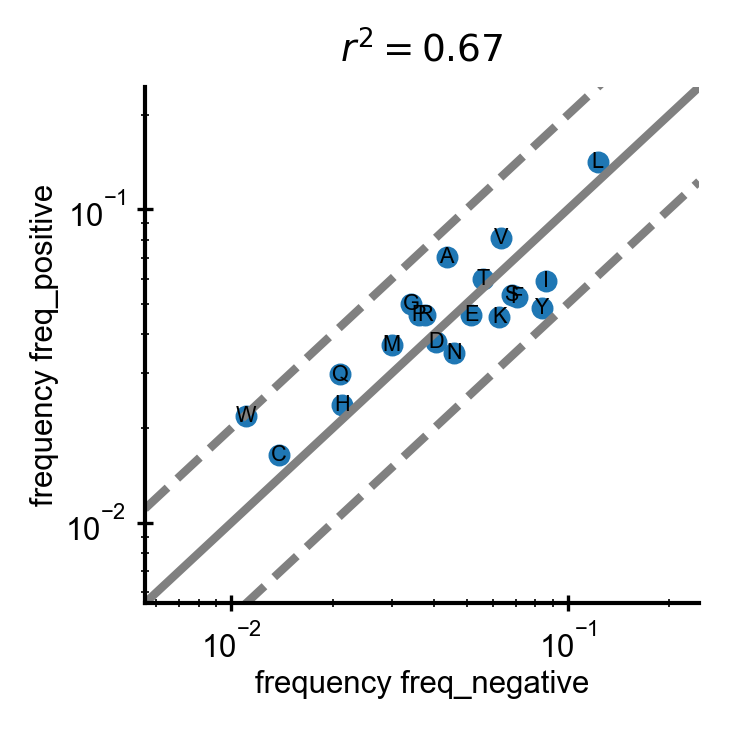

In [53]:
plot(dfmerged);

In [50]:
ratio = np.log2(dfmerged['freq_positive']/dfmerged['freq_negative'])
(dfmerged['freq_positive']*ratio).sum()

0.1700656430038975

In [42]:
np.savez('discriminator.npz', f=dfmerged['freq_positive']/dfmerged['freq_negative'])

In [46]:
aminoacids

'ACDEFGHIKLMNPQRSTVWY'

In [45]:
np.log(np.array(dfmerged['freq_positive']/dfmerged['freq_negative']))

array([ 0.48193764,  0.17388051, -0.0744985 , -0.11835821, -0.30124254,
        0.38016025,  0.10364617, -0.37721717, -0.31846582,  0.14079657,
        0.20614751, -0.27399991,  0.24400758,  0.34661531,  0.19912692,
       -0.24466053,  0.06847716,  0.242063  ,  0.68027512, -0.54776544])